# Line Defect Simulations

Now we try to simulate different line defect using MEEP

I will begin with 2D lattice and then the 3D lattice case.

## 2D line defect in triangle lattice
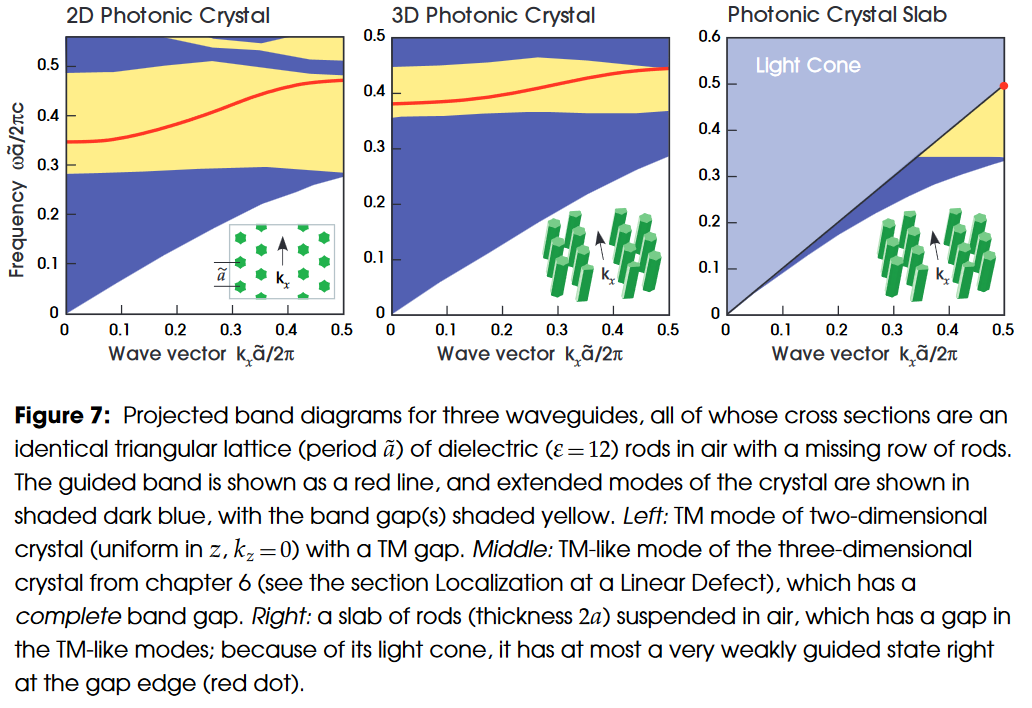
What I will trying to simulate is shown above,

In [26]:
from meep import mpb
import numpy as np
import meep as mp
import matplotlib.pyplot as plt
from mayavi import mlab

import math

import meep as mp
from meep import mpb

# A line_defect waveguide in a 2d triangular lattice of dielectric
# rods (c.f. tri_rods.ctl), formed by a row of missing rods along the
# "x" direction.  (Here, "x" and "y" refer to the first and second
# basis directions.)  This structure supports a single guided band
# within the band gap, much like the analogous waveguide in a square
# lattice of rods (see "Photonic Crystals" by Joannopoulos et al.).

supercell_y = 7  # the (odd) number of lateral supercell periods

geometry_lattice = mp.Lattice(
    size=mp.Vector3(1, supercell_y),
    basis1=mp.Vector3(math.sqrt(3) / 2, 0.5),
    basis2=mp.Vector3(math.sqrt(3) / 2, -0.5),
)

eps = 12  # the dielectric constant of the rods
r = 0.14  # the rod radius in the bulk crystal

geometry = [mp.Cylinder(r, material=mp.Medium(epsilon=eps))]

# duplicate the bulk crystal rods over the supercell:
geometry = mp.geometric_objects_lattice_duplicates(geometry_lattice, geometry)

# add a rod of air, to erase a row of rods and form a waveguide:
geometry += [mp.Cylinder(r, material=mp.air)]

Gamma = mp.Vector3()
K_prime = mp.lattice_to_reciprocal(
    mp.Vector3(0.5), geometry_lattice
)  # edge of Brillouin zone.
k_points = mp.interpolate(6, [Gamma, K_prime])

# the bigger the supercell, the more bands you need to compute to get
# to the defect modes (the lowest band is "folded" supercell_y times):
extra_bands = 25  # number of extra bands to compute above the gap
num_bands = supercell_y + extra_bands

resolution = 32

ms = mpb.ModeSolver(
    geometry_lattice=geometry_lattice,
    geometry=geometry,
    k_points=k_points,
    num_bands=num_bands,
    resolution=resolution,
)
ms.run_tm()
tm_freqs = ms.all_freqs

Initializing eigensolver data
Computing 32 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 32 x 224 x 1.
Solving for 11 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (0.866025, 0.5, 0)
     (6.06218, -3.5, 0)
     (0, 0, 1)
Cell volume = 6.06218
Reciprocal lattice vectors (/ 2 pi):
     (0.57735, 1, -0)
     (0.0824786, -0.142857, 0)
     (-0, 0, 1)
Geometric objects:
     cylinder, center = (0,3,0)
          radius 0.14, height 1e+20, axis (0, 0, 1)
     cylinder, center = (0,2,0)
          radius 0.14, height 1e+20, axis (0, 0, 1)
     cylinder, center = (0,1,0)
          radius 0.14, height 1e+20, axis (0, 0, 1)
     cylinder, center = (0,0,0)
          radius 0.14, height 1e+20, axis (0, 0, 1)
     cylinder, center = (0,-1,0)
          radius 0.14, height 1e+20, axis (0, 0, 1)
     cylinder, center = (0,-2,0)
          radius 0.14, height 1e+20, axis (0, 0, 1)
     cylinder, center = (0,-3,0)
          radius 0.14, height 1e+20, ax

    iteration   25: trace = 5.99461195754972 (0.000148234% change)
    linmin: converged after 2 iterations.
    iteration   26: trace = 5.994608930971793 (5.04883e-05% change)
    linmin: converged after 2 iterations.
    iteration   27: trace = 5.994607645983484 (2.14357e-05% change)
    linmin: converged after 2 iterations.
    iteration   28: trace = 5.994607102509251 (9.06605e-06% change)
Finished solving for bands 13 to 23 after 28 iterations.
Solving for bands 24 to 32...
    near maximum in trace
    linmin: converged after 7 iterations.
    iteration    1: trace = 29.95048425417713 (193.91% change)
    linmin: converged after 8 iterations.
    iteration    2: trace = 10.37423833417047 (97.093% change)
    linmin: converged after 5 iterations.
    iteration    3: trace = 8.593949733428019 (18.7713% change)
    linmin: converged after 5 iterations.
    iteration    4: trace = 8.041829406360195 (6.63775% change)
    linmin: converged after 4 iterations.
    iteration    5: trace 

    iteration    9: trace = 8.15883067946211 (2.29913e-05% change)
    linmin: converged after 2 iterations.
    iteration   10: trace = 8.158830234258101 (5.45671e-06% change)
Finished solving for bands 23 to 32 after 10 iterations.
Finished k-point with 12.4062 mean iterations/band.
tmfreqs:, 2, 0.0714286, 0.25, 0, 0.0714286, 0.0550799, 0.13266, 0.141691, 0.2377, 0.254841, 0.312013, 0.37225, 0.546685, 0.551469, 0.573977, 0.574096, 0.592841, 0.596083, 0.72057, 0.723515, 0.735323, 0.736867, 0.746873, 0.749305, 0.756146, 0.758549, 0.775965, 0.781474, 0.800964, 0.807116, 0.850494, 0.883229, 0.925626, 0.931369, 0.981862, 1.01485, 1.01662
elapsed time for k point: 1.9669947624206543
solve_kpoint (0.142857,0.5,0):
Solving for bands 1 to 11...
    linmin: converged after 4 iterations.
    iteration    1: trace = 1.729948390953895 (0.863577% change)
    linmin: converged after 4 iterations.
    iteration    2: trace = 1.727379269342604 (0.148619% change)
    linmin: converged after 4 iteratio

    linmin: converged after 4 iterations.
    iteration    6: trace = 5.544285332101117 (0.00370715% change)
    linmin: converged after 4 iterations.
    iteration    7: trace = 5.544127988824876 (0.00283798% change)
    linmin: converged after 3 iterations.
    iteration    8: trace = 5.543883348547904 (0.0044127% change)
    large trace change predicted (0.0136408%)
    linmin: converged after 4 iterations.
    iteration    9: trace = 5.54318146367042 (0.0126613% change)
    large trace change predicted (0.0283109%)
    linmin: converged after 4 iterations.
    iteration   10: trace = 5.541778526145047 (0.0253125% change)
    linmin: converged after 4 iterations.
    iteration   11: trace = 5.540408081363279 (0.0247324% change)
    linmin: converged after 4 iterations.
    iteration   12: trace = 5.539463123674317 (0.0170572% change)
    linmin: converged after 3 iterations.
    iteration   13: trace = 5.539083300409398 (0.00685692% change)
    linmin: converged after 3 iterations.


    linmin: converged after 5 iterations.
    iteration   17: trace = 5.485063286576182 (0.0121791% change)
    linmin: converged after 4 iterations.
    iteration   18: trace = 5.484331872891974 (0.0133355% change)
    linmin: converged after 4 iterations.
    iteration   19: trace = 5.483714521863231 (0.0112573% change)
    linmin: converged after 4 iterations.
    iteration   20: trace = 5.483192894369052 (0.00951275% change)
    linmin: converged after 4 iterations.
    iteration   21: trace = 5.482754450545242 (0.00799646% change)
    linmin: converged after 3 iterations.
    iteration   22: trace = 5.48237832885078 (0.00686032% change)
    linmin: converged after 3 iterations.
    iteration   23: trace = 5.482070020473362 (0.00562378% change)
    linmin: converged after 3 iterations.
    iteration   24: trace = 5.481826227120018 (0.0044472% change)
    linmin: converged after 3 iterations.
    iteration   25: trace = 5.481639798305455 (0.00340091% change)
    linmin: converged af

    iteration    5: trace = 5.421736759215436 (0.0143917% change)
    linmin: converged after 4 iterations.
    iteration    6: trace = 5.420962559648289 (0.0142806% change)
    linmin: converged after 4 iterations.
    iteration    7: trace = 5.420565307576137 (0.00732834% change)
    linmin: converged after 4 iterations.
    iteration    8: trace = 5.420398760208051 (0.00307256% change)
    linmin: converged after 2 iterations.
    iteration    9: trace = 5.420341413967632 (0.00105798% change)
    linmin: converged after 2 iterations.
    iteration   10: trace = 5.420328947720443 (0.00022999% change)
    linmin: converged after 2 iterations.
    iteration   11: trace = 5.420325326171303 (6.68142e-05% change)
    linmin: converged after 2 iterations.
    iteration   12: trace = 5.420321740421612 (6.61538e-05% change)
    large trace change predicted (0.000175656%)
    linmin: converged after 3 iterations.
    iteration   13: trace = 5.420312223514366 (0.000175578% change)
    large tr

    linmin: converged after 2 iterations.
    iteration   79: trace = 5.414420313570535 (1.15284e-05% change)
    linmin: converged after 2 iterations.
    iteration   80: trace = 5.414419510471268 (1.48326e-05% change)
    linmin: converged after 2 iterations.
    iteration   81: trace = 5.414418692002982 (1.51165e-05% change)
    linmin: converged after 2 iterations.
    iteration   82: trace = 5.414418040426023 (1.20341e-05% change)
    linmin: converged after 2 iterations.
    iteration   83: trace = 5.414417289230194 (1.3874e-05% change)
    linmin: converged after 2 iterations.
    iteration   84: trace = 5.414416678320408 (1.1283e-05% change)
    linmin: converged after 2 iterations.
    iteration   85: trace = 5.414416440754573 (4.38765e-06% change)
Finished solving for bands 12 to 22 after 85 iterations.
Solving for bands 23 to 32...
    linmin: converged after 5 iterations.
    iteration    1: trace = 7.72005555971562 (4.48909% change)
    linmin: converged after 5 iterations

    linmin: converged after 3 iterations.
    iteration   68: trace = 7.597869448100714 (0.000216715% change)
    linmin: converged after 3 iterations.
    iteration   69: trace = 7.597853601834329 (0.000208562% change)
    resetting CG direction...
    large trace change predicted (0.0204017%)
    linmin: converged after 3 iterations.
    iteration   70: trace = 7.596305618026546 (0.020376% change)
    linmin: converged after 4 iterations.
    iteration   71: trace = 7.595872430986295 (0.00570276% change)
    linmin: converged after 4 iterations.
    iteration   72: trace = 7.595690852609327 (0.00239052% change)
    linmin: converged after 2 iterations.
    iteration   73: trace = 7.595601325820629 (0.00117866% change)
    linmin: converged after 2 iterations.
    iteration   74: trace = 7.595554674504312 (0.00061419% change)
    linmin: converged after 2 iterations.
    iteration   75: trace = 7.595540356982056 (0.000188499% change)
    linmin: converged after 2 iterations.
    itera

    linmin: converged after 3 iterations.
    iteration    7: trace = 5.35248897192095 (0.070338% change)
    linmin: converged after 3 iterations.
    iteration    8: trace = 5.351365294152151 (0.0209958% change)
    linmin: converged after 3 iterations.
    iteration    9: trace = 5.351056332130895 (0.00577368% change)
    linmin: converged after 2 iterations.
    iteration   10: trace = 5.350921969701134 (0.00251098% change)
    linmin: converged after 4 iterations.
    iteration   11: trace = 5.350844495566854 (0.00144788% change)
    linmin: converged after 2 iterations.
    iteration   12: trace = 5.350807643708885 (0.000688713% change)
    linmin: converged after 2 iterations.
    iteration   13: trace = 5.35079438379096 (0.000247812% change)
    linmin: converged after 2 iterations.
    iteration   14: trace = 5.350789339632024 (9.42694e-05% change)
    linmin: converged after 2 iterations.
    iteration   15: trace = 5.350787483504607 (3.46889e-05% change)
    linmin: converge

epsilon: 1-12, mean 2.36812, harm. mean 1.14348, 14.8158% > 1, 12.4375% "fill"
real part range: 1 .. 12


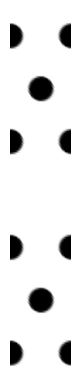

epsilon: 1-12, mean 2.36812, harm. mean 1.14348, 14.8158% > 1, 12.4375% "fill"
real part range: 1 .. 12


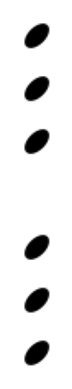

In [16]:
import matplotlib.pyplot as plt
md = mpb.MPBData(rectify=True, periods=1, resolution=64)
eps = ms.get_epsilon()
converted_eps = md.convert(eps)

plt.imshow(converted_eps.T, interpolation='spline36', cmap='binary')
plt.axis('off')
plt.show()

import matplotlib.pyplot as plt
md = mpb.MPBData(rectify=False, periods=1, resolution=64)
eps = ms.get_epsilon()
converted_eps = md.convert(eps)

plt.imshow(converted_eps.T, interpolation='spline36', cmap='binary')
plt.axis('off')
plt.show()

Text(0, 0.5, '$\\omega a/(2\\pi c)$')

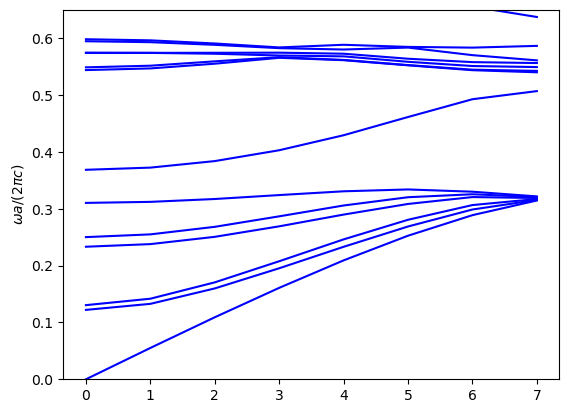

In [30]:
import matplotlib.pyplot as plt
numk,tmp=np.shape(tm_freqs)
klist=range(numk)

fig,ax=plt.subplots()
x = range(len(tm_freqs))
for l in range(num_bands):
    plt.plot(tm_freqs[:,l],'b-')
plt.ylim([0,0.65])
plt.ylabel('$\omega a/(2\pi c)$')

We can see that the results are neally the same with results from textbook.

## 3D line defect
Now I will try to simulate the 3D line defect

In [4]:
from meep import mpb
import numpy as np
import meep as mp
import matplotlib.pyplot as plt
from mayavi import mlab

import math

import meep as mp
from meep import mpb

# A line_defect waveguide in a 3d triangular lattice of dielectric
# rods (c.f. tri_rods.ctl), formed by a row of missing rods along the
# "x" direction.  (Here, "x" and "y" refer to the first and second
# basis directions.)  This structure supports a single guided band
# within the band gap, much like the analogous waveguide in a square
# lattice of rods (see "Photonic Crystals" by Joannopoulos et al.).

supercell_y = 9  # the (odd) number of lateral supercell periods

geometry_lattice = mp.Lattice(
    size=mp.Vector3(1, supercell_y,6),
    basis1=mp.Vector3(math.sqrt(3) / 2, 0.5),
    basis2=mp.Vector3(math.sqrt(3) / 2, -0.5),
)

# to generate the structures
geometry_lattice_copy = mp.Lattice(
    size=mp.Vector3(1, supercell_y,1),
    basis1=mp.Vector3(math.sqrt(3) / 2, 0.5),
    basis2=mp.Vector3(math.sqrt(3) / 2, -0.5),
)

eps = 12  # the dielectric constant of the rods
r = 0.14  # the rod radius in the bulk crystal
h=2

geometry = [mp.Cylinder(center=mp.Vector3(),radius=r, height=h,material=mp.Medium(epsilon=eps))]


# duplicate the bulk crystal rods over the supercell:
geometry = mp.geometric_objects_lattice_duplicates(geometry_lattice_copy, geometry)

# add a rod of air, to erase a row of rods and form a waveguide:
geometry += [mp.Cylinder(center=mp.Vector3(),radius=r, height=h,material=mp.air)]

Gamma = mp.Vector3()
K_prime = mp.lattice_to_reciprocal(
    mp.Vector3(0.5), geometry_lattice
)  # edge of Brillouin zone.
k_points = mp.interpolate(6, [Gamma, K_prime])

# the bigger the supercell, the more bands you need to compute to get
# to the defect modes (the lowest band is "folded" supercell_y times):
extra_bands = 20  # number of extra bands to compute above the gap
num_bands = supercell_y + extra_bands

resolution = 10

ms = mpb.ModeSolver(
    geometry_lattice=geometry_lattice,
    geometry=geometry,
    k_points=k_points,
    num_bands=num_bands,
    resolution=resolution,
)
ms.run_tm()
tm_freqs = ms.all_freqs

Initializing eigensolver data
Computing 27 bands with 1e-07 tolerance
Working in 3 dimensions.
Grid size is 10 x 70 x 50.
Solving for 9 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (0.866025, 0.5, 0)
     (6.06218, -3.5, 0)
     (0, 0, 5)
Cell volume = 30.3109
Reciprocal lattice vectors (/ 2 pi):
     (0.57735, 1, -0)
     (0.0824786, -0.142857, 0)
     (-0, 0, 0.2)
Geometric objects:
     cylinder, center = (0,3,2)
          radius 0.14, height 2, axis (0, 0, 1)
     cylinder, center = (0,2,2)
          radius 0.14, height 2, axis (0, 0, 1)
     cylinder, center = (0,1,2)
          radius 0.14, height 2, axis (0, 0, 1)
     cylinder, center = (0,0,2)
          radius 0.14, height 2, axis (0, 0, 1)
     cylinder, center = (0,-1,2)
          radius 0.14, height 2, axis (0, 0, 1)
     cylinder, center = (0,-2,2)
          radius 0.14, height 2, axis (0, 0, 1)
     cylinder, center = (0,-3,2)
          radius 0.14, height 2, axis (0, 0, 1)
     cylinder,

    linmin: converged after 3 iterations.
    iteration   34: trace = 0.3747678383208149 (0.000843999% change)
    linmin: converged after 3 iterations.
    iteration   35: trace = 0.3747644508177547 (0.000903898% change)
    linmin: converged after 3 iterations.
    iteration   36: trace = 0.3747611199120925 (0.000888804% change)
    linmin: converged after 3 iterations.
    iteration   37: trace = 0.3747561969107516 (0.00131365% change)
    linmin: converged after 3 iterations.
    iteration   38: trace = 0.3747499981631794 (0.00165409% change)
    linmin: converged after 3 iterations.
    iteration   39: trace = 0.3747406795175223 (0.00248666% change)
    linmin: converged after 3 iterations.
    iteration   40: trace = 0.3747305611393286 (0.00270014% change)
    linmin: converged after 3 iterations.
    iteration   41: trace = 0.3747203992009333 (0.00271184% change)
    linmin: converged after 3 iterations.
    iteration   42: trace = 0.37471092749197 (0.00252771% change)
    linmi

    iteration   50: trace = 0.9784014459472949 (8.50579e-05% change)
    linmin: converged after 2 iterations.
    iteration   51: trace = 0.978400791244863 (6.69155e-05% change)
    linmin: converged after 2 iterations.
    iteration   52: trace = 0.978400315244198 (4.86509e-05% change)
    linmin: converged after 2 iterations.
    iteration   53: trace = 0.9784000236129824 (2.98069e-05% change)
    linmin: converged after 2 iterations.
    iteration   54: trace = 0.9783998318506012 (1.95996e-05% change)
    linmin: converged after 2 iterations.
    iteration   55: trace = 0.9783997225583912 (1.11705e-05% change)
    linmin: converged after 2 iterations.
    iteration   56: trace = 0.9783996552323435 (6.88124e-06% change)
Finished solving for bands 11 to 19 after 56 iterations.
Solving for bands 20 to 27...
    near maximum in trace
    linmin: converged after 7 iterations.
    iteration    1: trace = 8.796118138051735 (185.149% change)
    linmin: converged after 10 iterations.
    i

    iteration   38: trace = 0.3418557954576659 (0.000388439% change)
    linmin: converged after 2 iterations.
    iteration   39: trace = 0.3418548194433123 (0.000285505% change)
    linmin: converged after 2 iterations.
    iteration   40: trace = 0.3418541738584037 (0.000188848% change)
    linmin: converged after 2 iterations.
    iteration   41: trace = 0.341853720731363 (0.00013255% change)
    linmin: converged after 2 iterations.
    iteration   42: trace = 0.3418533486575698 (0.00010884% change)
    linmin: converged after 2 iterations.
    iteration   43: trace = 0.3418530128926855 (9.8219e-05% change)
    linmin: converged after 2 iterations.
    iteration   44: trace = 0.3418527427386776 (7.90264e-05% change)
    linmin: converged after 2 iterations.
    iteration   45: trace = 0.3418525279526672 (6.283e-05% change)
    linmin: converged after 2 iterations.
    iteration   46: trace = 0.3418523827171194 (4.24849e-05% change)
    linmin: converged after 2 iterations.
    ite

    iteration   16: trace = 1.001100804567538 (0.000252148% change)
    linmin: converged after 2 iterations.
    iteration   17: trace = 1.001099199306645 (0.00016035% change)
    linmin: converged after 2 iterations.
    iteration   18: trace = 1.001098459404601 (7.3909e-05% change)
    linmin: converged after 2 iterations.
    iteration   19: trace = 1.001097891718195 (5.67064e-05% change)
    linmin: converged after 2 iterations.
    iteration   20: trace = 1.001097432724133 (4.58491e-05% change)
    linmin: converged after 2 iterations.
    iteration   21: trace = 1.001097071956738 (3.60372e-05% change)
    linmin: converged after 2 iterations.
    iteration   22: trace = 1.001096901315067 (1.70455e-05% change)
    linmin: converged after 2 iterations.
    iteration   23: trace = 1.001096827772284 (7.34622e-06% change)
Finished solving for bands 10 to 18 after 23 iterations.
Solving for bands 19 to 27...
    linmin: converged after 4 iterations.
    iteration    1: trace = 1.56517

Finished solving for bands 10 to 18 after 41 iterations.
Solving for bands 19 to 27...
    linmin: converged after 4 iterations.
    iteration    1: trace = 1.707952077809268 (0.80129% change)
    linmin: converged after 4 iterations.
    iteration    2: trace = 1.705412917037901 (0.148778% change)
    linmin: converged after 2 iterations.
    iteration    3: trace = 1.705037488493127 (0.0220164% change)
    linmin: converged after 4 iterations.
    iteration    4: trace = 1.704874572656432 (0.00955543% change)
    linmin: converged after 2 iterations.
    iteration    5: trace = 1.704840567619873 (0.0019946% change)
    linmin: converged after 2 iterations.
    iteration    6: trace = 1.704817959924677 (0.0013261% change)
    linmin: converged after 2 iterations.
    iteration    7: trace = 1.704810250943131 (0.000452189% change)
    linmin: converged after 2 iterations.
    iteration    8: trace = 1.70480625440018 (0.000234428% change)
    linmin: converged after 2 iterations.
    it

    linmin: converged after 3 iterations.
    iteration   45: trace = 1.254993142924009 (0.00259077% change)
    linmin: converged after 3 iterations.
    iteration   46: trace = 1.254966169534518 (0.00214931% change)
    linmin: converged after 3 iterations.
    iteration   47: trace = 1.254944618828849 (0.00171725% change)
    linmin: converged after 3 iterations.
    iteration   48: trace = 1.254928542796776 (0.00128102% change)
    linmin: converged after 3 iterations.
    iteration   49: trace = 1.254915630015045 (0.00102897% change)
    linmin: converged after 3 iterations.
    iteration   50: trace = 1.254905915764047 (0.000774099% change)
    linmin: converged after 3 iterations.
    iteration   51: trace = 1.25489917831496 (0.00053689% change)
    linmin: converged after 3 iterations.
    iteration   52: trace = 1.254893604150235 (0.000444193% change)
    linmin: converged after 3 iterations.
    iteration   53: trace = 1.254889054121922 (0.000362583% change)
    linmin: conve

    iteration   34: trace = 0.8442495184462306 (0.496105% change)
    linmin: converged after 6 iterations.
    iteration   35: trace = 0.8410752237705356 (0.376698% change)
    linmin: converged after 6 iterations.
    iteration   36: trace = 0.8398645930809068 (0.144042% change)
    linmin: converged after 6 iterations.
    iteration   37: trace = 0.8389045276236735 (0.114377% change)
    linmin: converged after 5 iterations.
    iteration   38: trace = 0.8383512280304262 (0.0659768% change)
    linmin: converged after 5 iterations.
    iteration   39: trace = 0.837839313668958 (0.0610807% change)
    linmin: converged after 4 iterations.
    iteration   40: trace = 0.8375686771421654 (0.0323069% change)
    linmin: converged after 3 iterations.
    iteration   41: trace = 0.8374385339276106 (0.0155394% change)
    linmin: converged after 3 iterations.
    iteration   42: trace = 0.8373469965693993 (0.0109312% change)
    linmin: converged after 3 iterations.
    iteration   43: trac

    linmin: converged after 3 iterations.
    iteration   30: trace = 2.143146537152633 (0.00648533% change)
    linmin: converged after 3 iterations.
    iteration   31: trace = 2.14299637559825 (0.00700684% change)
    linmin: converged after 3 iterations.
    iteration   32: trace = 2.142854661266533 (0.00661312% change)
    linmin: converged after 3 iterations.
    iteration   33: trace = 2.142735232163399 (0.00557352% change)
    linmin: converged after 3 iterations.
    iteration   34: trace = 2.142628509575969 (0.00498079% change)
    linmin: converged after 3 iterations.
    iteration   35: trace = 2.142519618095974 (0.00508227% change)
    linmin: converged after 3 iterations.
    iteration   36: trace = 2.142407201877933 (0.00524705% change)
    linmin: converged after 3 iterations.
    iteration   37: trace = 2.14230904449717 (0.00458174% change)
    linmin: converged after 3 iterations.
    iteration   38: trace = 2.142240403955301 (0.0032041% change)
    linmin: converged 

    linmin: converged after 2 iterations.
    iteration    3: trace = 1.635685466589622 (0.0613715% change)
    linmin: converged after 4 iterations.
    iteration    4: trace = 1.63522978601898 (0.0278626% change)
    linmin: converged after 2 iterations.
    iteration    5: trace = 1.635136346734815 (0.0057143% change)
    linmin: converged after 4 iterations.
    iteration    6: trace = 1.635084998392126 (0.00314036% change)
    linmin: converged after 2 iterations.
    iteration    7: trace = 1.635062134557514 (0.00139834% change)
    linmin: converged after 2 iterations.
    iteration    8: trace = 1.63504595500104 (0.000989543% change)
    linmin: converged after 2 iterations.
    iteration    9: trace = 1.63503421396169 (0.000718089% change)
    linmin: converged after 2 iterations.
    iteration   10: trace = 1.635020790466581 (0.000820995% change)
    linmin: converged after 3 iterations.
    iteration   11: trace = 1.635002553042923 (0.00111543% change)
    linmin: converged 

    iteration   77: trace = 1.63394005711226 (2.90593e-05% change)
    linmin: converged after 2 iterations.
    iteration   78: trace = 1.633939527761293 (3.23972e-05% change)
    linmin: converged after 2 iterations.
    iteration   79: trace = 1.633938785526708 (4.54261e-05% change)
    linmin: converged after 3 iterations.
    iteration   80: trace = 1.633937839048987 (5.79262e-05% change)
    linmin: converged after 3 iterations.
    iteration   81: trace = 1.633936870773847 (5.92602e-05% change)
    linmin: converged after 3 iterations.
    iteration   82: trace = 1.633935765817592 (6.76254e-05% change)
    linmin: converged after 3 iterations.
    iteration   83: trace = 1.63393476723945 (6.11149e-05% change)
    linmin: converged after 3 iterations.
    iteration   84: trace = 1.63393338212655 (8.47717e-05% change)
    linmin: converged after 3 iterations.
    iteration   85: trace = 1.633931759288497 (9.9321e-05% change)
    linmin: converged after 3 iterations.
    iteration 

    linmin: converged after 3 iterations.
    iteration   59: trace = 2.350298184539717 (0.000148317% change)
    linmin: converged after 3 iterations.
    iteration   60: trace = 2.350294873768423 (0.000140866% change)
    linmin: converged after 3 iterations.
    iteration   61: trace = 2.35029215781311 (0.000115558% change)
    linmin: converged after 3 iterations.
    iteration   62: trace = 2.35028994021902 (9.4354e-05% change)
    linmin: converged after 3 iterations.
    iteration   63: trace = 2.350287882774941 (8.754e-05% change)
    linmin: converged after 3 iterations.
    iteration   64: trace = 2.350285818959513 (8.78112e-05% change)
    linmin: converged after 3 iterations.
    iteration   65: trace = 2.35028378679046 (8.64648e-05% change)
    linmin: converged after 3 iterations.
    iteration   66: trace = 2.350281694123202 (8.9039e-05% change)
    linmin: converged after 3 iterations.
    iteration   67: trace = 2.350279364929009 (9.91028e-05% change)
    linmin: conve

    linmin: converged after 3 iterations.
    iteration  133: trace = 2.350087691370909 (8.52571e-05% change)
    linmin: converged after 3 iterations.
    iteration  134: trace = 2.35008568875992 (8.52143e-05% change)
    linmin: converged after 3 iterations.
    iteration  135: trace = 2.35008369043064 (8.50322e-05% change)
    linmin: converged after 3 iterations.
    iteration  136: trace = 2.350081700277086 (8.46844e-05% change)
    linmin: converged after 3 iterations.
    iteration  137: trace = 2.350079722649785 (8.41515e-05% change)
    linmin: converged after 3 iterations.
    iteration  138: trace = 2.350077762116984 (8.34241e-05% change)
    linmin: converged after 3 iterations.
    iteration  139: trace = 2.350075823194801 (8.25046e-05% change)
    resetting CG direction...
    large trace change predicted (0.00704404%)
    linmin: converged after 2 iterations.
    iteration  140: trace = 2.34991023153594 (0.00704647% change)
    linmin: converged after 3 iterations.
    i

    iteration    6: trace = 1.006247785674206 (0.0193383% change)
    linmin: converged after 4 iterations.
    iteration    7: trace = 1.006134445968093 (0.0112642% change)
    linmin: converged after 2 iterations.
    iteration    8: trace = 1.006100487606769 (0.00337519% change)
    linmin: converged after 2 iterations.
    iteration    9: trace = 1.006079845293437 (0.00205174% change)
    linmin: converged after 4 iterations.
    iteration   10: trace = 1.006051516086786 (0.00281584% change)
    linmin: converged after 4 iterations.
    iteration   11: trace = 1.006030588186577 (0.00208022% change)
    linmin: converged after 4 iterations.
    iteration   12: trace = 1.005999643435493 (0.00307597% change)
    linmin: converged after 4 iterations.
    iteration   13: trace = 1.005961516114047 (0.00379007% change)
    linmin: converged after 4 iterations.
    iteration   14: trace = 1.005896499345654 (0.00646336% change)
    linmin: converged after 4 iterations.
    iteration   15: t

    linmin: converged after 2 iterations.
    iteration   80: trace = 1.004617907427099 (0.000611998% change)
    linmin: converged after 2 iterations.
    iteration   81: trace = 1.004613574733434 (0.000431279% change)
    linmin: converged after 3 iterations.
    iteration   82: trace = 1.004606043158897 (0.000749701% change)
    large trace change predicted (0.00272282%)
    linmin: converged after 3 iterations.
    iteration   83: trace = 1.004578592248257 (0.00273254% change)
    large trace change predicted (0.0117011%)
    linmin: converged after 4 iterations.
    iteration   84: trace = 1.00447535086726 (0.0102776% change)
    linmin: converged after 4 iterations.
    iteration   85: trace = 1.00436010535012 (0.0114739% change)
    linmin: converged after 3 iterations.
    iteration   86: trace = 1.00426990271464 (0.00898151% change)
    linmin: converged after 4 iterations.
    iteration   87: trace = 1.004185464068795 (0.00840832% change)
    linmin: converged after 4 iterati

    iteration   14: trace = 1.797612341228544 (0.382197% change)
    linmin: converged after 5 iterations.
    iteration   15: trace = 1.790441318017779 (0.399717% change)
    linmin: converged after 4 iterations.
    iteration   16: trace = 1.786217238542795 (0.236203% change)
    linmin: converged after 3 iterations.
    iteration   17: trace = 1.78429353750251 (0.107755% change)
    linmin: converged after 3 iterations.
    iteration   18: trace = 1.783428194574769 (0.0485096% change)
    linmin: converged after 3 iterations.
    iteration   19: trace = 1.782719628142811 (0.0397385% change)
    linmin: converged after 3 iterations.
    iteration   20: trace = 1.782217224861054 (0.0281858% change)
    linmin: converged after 3 iterations.
    iteration   21: trace = 1.781783576817693 (0.0243349% change)
    linmin: converged after 3 iterations.
    iteration   22: trace = 1.78115571992899 (0.0352438% change)
    linmin: converged after 3 iterations.
    iteration   23: trace = 1.7801

    iteration   17: trace = 2.365630700441608 (0.10622% change)
    linmin: converged after 3 iterations.
    iteration   18: trace = 2.363939411978439 (0.0715198% change)
    linmin: converged after 3 iterations.
    iteration   19: trace = 2.363062147188141 (0.0371172% change)
    linmin: converged after 3 iterations.
    iteration   20: trace = 2.362488776830071 (0.0242668% change)
    linmin: converged after 3 iterations.
    iteration   21: trace = 2.362140224082791 (0.0147547% change)
    linmin: converged after 3 iterations.
    iteration   22: trace = 2.361889064320308 (0.0106333% change)
    linmin: converged after 3 iterations.
    iteration   23: trace = 2.361706439193402 (0.00773246% change)
    linmin: converged after 3 iterations.
    iteration   24: trace = 2.361582990802799 (0.00522722% change)
    linmin: converged after 4 iterations.
    iteration   25: trace = 2.36145409708669 (0.00545809% change)
    linmin: converged after 4 iterations.
    iteration   26: trace = 

In [ ]:
import matplotlib.pyplot as plt
numk,tmp=np.shape(tm_freqs)
klist=np.linspace(0,0.5,numk)
fig,ax=plt.subplots()
x = range(len(tm_freqs))
ratio=len(tm_freqs)
for l in range(num_bands):
    plt.plot(klist,tm_freqs[:,l],'b-')
plt.plot(klist,klist,'r-')
plt.ylim([0,0.65])
plt.ylabel('$\omega a/(2\pi c)$')

可以看到，与最右边的图是一样的

## 3D hole defect

Now we change the rods into holes

In [2]:
from meep import mpb
import numpy as np
import meep as mp
import matplotlib.pyplot as plt
#from mayavi import mlab

import math

import meep as mp
from meep import mpb

# A line_defect waveguide in a 3d triangular lattice of dielectric
# rods (c.f. tri_rods.ctl), formed by a row of missing rods along the
# "x" direction.  (Here, "x" and "y" refer to the first and second
# basis directions.)  This structure supports a single guided band
# within the band gap, much like the analogous waveguide in a square
# lattice of rods (see "Photonic Crystals" by Joannopoulos et al.).

supercell_y = 9  # the (odd) number of lateral supercell periods

geometry_lattice = mp.Lattice(
    size=mp.Vector3(1, supercell_y,5),
    basis1=mp.Vector3(math.sqrt(3) / 2, 0.5),
    basis2=mp.Vector3(math.sqrt(3) / 2, -0.5),
)

# 我们只在一个方向进行周期拓展
geometry_lattice_copy = mp.Lattice(
    size=mp.Vector3(1, supercell_y,0),
    basis1=mp.Vector3(math.sqrt(3) / 2, 0.5),
    basis2=mp.Vector3(math.sqrt(3) / 2, -0.5),
)
a=1
r = 0.35  # the rod radius in the bulk crystal
h=0.3

Si = mp.Medium(index=2.1376)

geometry = [ mp.Block(material=Si,size=(a,a,h),
                      center=mp.Vector3(),
                      e1=mp.cartesian_to_lattice(mp.Vector3(1,0,0),geometry_lattice),
                      e2=mp.cartesian_to_lattice(mp.Vector3(0,1,0),geometry_lattice),
                      e3=mp.cartesian_to_lattice(mp.Vector3(0,0,1),geometry_lattice),),
             mp.Cylinder(center=mp.Vector3(),radius=r, height=h, material=mp.air)]

# duplicate the bulk crystal rods over the supercell:
geometry = mp.geometric_objects_lattice_duplicates(geometry_lattice_copy, geometry)

# add a rod of Si, to erase a row of rods and form a waveguide:
geometry += [mp.Cylinder(center=mp.Vector3(),radius=r, height=h, material=Si)]


num_k = 11
k_points = mp.interpolate(num_k, [mp.Vector3(0.4,0,),mp.Vector3(0.5,0)])

# the bigger the supercell, the more bands you need to compute to get
# to the defect modes (the lowest band is "folded" supercell_y times):
extra_bands = 20  # number of extra bands to compute above the gap
num_bands = extra_bands+supercell_y

resolution = 30

ms = mpb.ModeSolver(
    geometry_lattice=geometry_lattice,
    geometry=geometry,
    k_points=k_points,
    num_bands=num_bands,
    resolution=resolution,
)
ms.run_te()
te_freqs = ms.all_freqs

Initializing eigensolver data
Computing 29 bands with 1e-07 tolerance
Working in 3 dimensions.
Grid size is 30 x 270 x 150.
Solving for 10 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (0.866025, 0.5, 0)
     (7.79423, -4.5, 0)
     (0, 0, 5)
Cell volume = 38.9711
Reciprocal lattice vectors (/ 2 pi):
     (0.57735, 1, -0)
     (0.06415, -0.111111, 0)
     (-0, 0, 0.2)
Geometric objects:
     block, center = (0,4,0)
          size (1,1,0.3)
          axes (0.57735,0.57735,0), (1,-1,0), (0,0,1)
     block, center = (0,3,0)
          size (1,1,0.3)
          axes (0.57735,0.57735,0), (1,-1,0), (0,0,1)
     block, center = (0,2,0)
          size (1,1,0.3)
          axes (0.57735,0.57735,0), (1,-1,0), (0,0,1)
     block, center = (0,1,0)
          size (1,1,0.3)
          axes (0.57735,0.57735,0), (1,-1,0), (0,0,1)
     block, center = (0,0,0)
          size (1,1,0.3)
          axes (0.57735,0.57735,0), (1,-1,0), (0,0,1)
     block, center = (0,-1,0)
      

    iteration   44: trace = 1.635924461118309 (1.31351e-05% change)
    linmin: converged after 2 iterations.
    iteration   45: trace = 1.635924294697122 (1.01729e-05% change)
    linmin: converged after 2 iterations.
    iteration   46: trace = 1.635924209674697 (5.19721e-06% change)
Finished solving for bands 1 to 10 after 46 iterations.
Solving for bands 11 to 20...
    near maximum in trace
    linmin: converged after 8 iterations.
    iteration    1: trace = 39.53951478069365 (194.195% change)
    linmin: converged after 9 iterations.
    iteration    2: trace = 3.529413475615331 (167.221% change)
    linmin: converged after 5 iterations.
    iteration    3: trace = 2.691229324061017 (26.9485% change)
    linmin: converged after 5 iterations.
    iteration    4: trace = 2.468754430167315 (8.62309% change)
    linmin: converged after 5 iterations.
    iteration    5: trace = 2.374339974716848 (3.89893% change)
    linmin: converged after 4 iterations.
    iteration    6: trace = 

    iteration   42: trace = 2.635369744274372 (7.72123e-05% change)
    linmin: converged after 2 iterations.
    iteration   43: trace = 2.635368215553024 (5.80079e-05% change)
    linmin: converged after 2 iterations.
    iteration   44: trace = 2.635367118188328 (4.16399e-05% change)
    linmin: converged after 2 iterations.
    iteration   45: trace = 2.635366313278741 (3.05426e-05% change)
    linmin: converged after 2 iterations.
    iteration   46: trace = 2.63536580584342 (1.92548e-05% change)
    linmin: converged after 2 iterations.
    iteration   47: trace = 2.63536545545582 (1.32956e-05% change)
    linmin: converged after 2 iterations.
    iteration   48: trace = 2.635365224263801 (8.77267e-06% change)
Finished solving for bands 21 to 29 after 48 iterations.
Finished k-point with 41.1034 mean iterations/band.
zevenfreqs:, 1, 0.4, 0, 0, 0.46188, 0.339348, 0.359379, 0.369356, 0.389536, 0.405747, 0.420708, 0.430319, 0.432689, 0.438477, 0.444036, 0.445891, 0.449434, 0.454718,

    linmin: converged after 4 iterations.
    iteration    4: trace = 1.714290713915166 (0.00530857% change)
    linmin: converged after 4 iterations.
    iteration    5: trace = 1.71422643401236 (0.00374972% change)
    linmin: converged after 4 iterations.
    iteration    6: trace = 1.714171222742321 (0.00322082% change)
    linmin: converged after 4 iterations.
    iteration    7: trace = 1.714119809096237 (0.00299937% change)
    linmin: converged after 4 iterations.
    iteration    8: trace = 1.714062295896162 (0.00335532% change)
    linmin: converged after 4 iterations.
    iteration    9: trace = 1.713977094516721 (0.00497085% change)
    linmin: converged after 3 iterations.
    iteration   10: trace = 1.713839241205532 (0.00804321% change)
    linmin: converged after 4 iterations.
    iteration   11: trace = 1.713655875847018 (0.0106997% change)
    linmin: converged after 3 iterations.
    iteration   12: trace = 1.713512219349447 (0.00838339% change)
    linmin: converged

    linmin: converged after 4 iterations.
    iteration    6: trace = 1.744859017104397 (0.00471999% change)
    linmin: converged after 4 iterations.
    iteration    7: trace = 1.744819234814687 (0.00228% change)
    linmin: converged after 4 iterations.
    iteration    8: trace = 1.744798900544745 (0.00116542% change)
    linmin: converged after 2 iterations.
    iteration    9: trace = 1.744788563469279 (0.000592453% change)
    linmin: converged after 2 iterations.
    iteration   10: trace = 1.7447834342195 (0.000293976% change)
    linmin: converged after 2 iterations.
    iteration   11: trace = 1.744780659323421 (0.00015904% change)
    linmin: converged after 2 iterations.
    iteration   12: trace = 1.744778845883618 (0.000103935% change)
    linmin: converged after 2 iterations.
    iteration   13: trace = 1.744777742451646 (6.3242e-05% change)
    linmin: converged after 2 iterations.
    iteration   14: trace = 1.744777031192578 (4.0765e-05% change)
    linmin: converged

    iteration   22: trace = 1.769732191203576 (0.0085847% change)
    linmin: converged after 3 iterations.
    iteration   23: trace = 1.769602118879056 (0.0073501% change)
    linmin: converged after 3 iterations.
    iteration   24: trace = 1.769475222097703 (0.00717118% change)
    linmin: converged after 3 iterations.
    iteration   25: trace = 1.769377938631159 (0.00549802% change)
    linmin: converged after 3 iterations.
    iteration   26: trace = 1.769310557918482 (0.00380823% change)
    linmin: converged after 3 iterations.
    iteration   27: trace = 1.769260121765503 (0.00285065% change)
    linmin: converged after 3 iterations.
    iteration   28: trace = 1.769222843980134 (0.00210699% change)
    linmin: converged after 3 iterations.
    iteration   29: trace = 1.769192621567755 (0.00170825% change)
    linmin: converged after 3 iterations.
    iteration   30: trace = 1.769165608264266 (0.00152688% change)
    linmin: converged after 3 iterations.
    iteration   31: t

    iteration    4: trace = 2.492097389862642 (0.00146259% change)
    linmin: converged after 2 iterations.
    iteration    5: trace = 2.492081315999234 (0.000644995% change)
    linmin: converged after 2 iterations.
    iteration    6: trace = 2.492074936487449 (0.000255992% change)
    linmin: converged after 2 iterations.
    iteration    7: trace = 2.492072711472386 (8.92837e-05% change)
    linmin: converged after 2 iterations.
    iteration    8: trace = 2.492071533852497 (4.72546e-05% change)
    linmin: converged after 2 iterations.
    iteration    9: trace = 2.492070739028018 (3.18941e-05% change)
    linmin: converged after 2 iterations.
    iteration   10: trace = 2.492070127833448 (2.45256e-05% change)
    linmin: converged after 2 iterations.
    iteration   11: trace = 2.492069373420325 (3.02726e-05% change)
    linmin: converged after 2 iterations.
    iteration   12: trace = 2.49206841280679 (3.85468e-05% change)
    linmin: converged after 3 iterations.
    iteratio

    linmin: converged after 3 iterations.
    iteration   21: trace = 2.546040891568143 (0.00363007% change)
    linmin: converged after 3 iterations.
    iteration   22: trace = 2.545978821452626 (0.00243794% change)
    linmin: converged after 3 iterations.
    iteration   23: trace = 2.54593874448778 (0.00157414% change)
    linmin: converged after 3 iterations.
    iteration   24: trace = 2.545911692424539 (0.00106256% change)
    linmin: converged after 3 iterations.
    iteration   25: trace = 2.545890141320303 (0.000846502% change)
    linmin: converged after 3 iterations.
    iteration   26: trace = 2.545868335512327 (0.000856514% change)
    linmin: converged after 3 iterations.
    iteration   27: trace = 2.545845756030029 (0.000886911% change)
    linmin: converged after 3 iterations.
    iteration   28: trace = 2.545823962374822 (0.000856051% change)
    linmin: converged after 3 iterations.
    iteration   29: trace = 2.545801402568482 (0.000886153% change)
    linmin: con

    linmin: converged after 2 iterations.
    iteration   21: trace = 2.784448681069184 (0.000203476% change)
    linmin: converged after 2 iterations.
    iteration   22: trace = 2.78444508364622 (0.000129197% change)
    linmin: converged after 2 iterations.
    iteration   23: trace = 2.784442332438602 (9.88064e-05% change)
    linmin: converged after 2 iterations.
    iteration   24: trace = 2.784439758168178 (9.2452e-05% change)
    linmin: converged after 2 iterations.
    iteration   25: trace = 2.78443795728424 (6.46767e-05% change)
    linmin: converged after 2 iterations.
    iteration   26: trace = 2.784436682928435 (4.57671e-05% change)
    linmin: converged after 2 iterations.
    iteration   27: trace = 2.78443555447681 (4.05271e-05% change)
    linmin: converged after 2 iterations.
    iteration   28: trace = 2.784434839394393 (2.56814e-05% change)
    linmin: converged after 2 iterations.
    iteration   29: trace = 2.784434408798854 (1.54644e-05% change)
    linmin: co

    linmin: converged after 4 iterations.
    iteration   15: trace = 2.794772697784062 (0.00337436% change)
    linmin: converged after 4 iterations.
    iteration   16: trace = 2.794705574334405 (0.00240178% change)
    linmin: converged after 3 iterations.
    iteration   17: trace = 2.7946549467469 (0.00181157% change)
    linmin: converged after 3 iterations.
    iteration   18: trace = 2.794612931501315 (0.00150343% change)
    linmin: converged after 3 iterations.
    iteration   19: trace = 2.794581679255279 (0.00111831% change)
    linmin: converged after 3 iterations.
    iteration   20: trace = 2.794559811202745 (0.000782519% change)
    linmin: converged after 3 iterations.
    iteration   21: trace = 2.794545083748715 (0.000527006% change)
    linmin: converged after 2 iterations.
    iteration   22: trace = 2.794535121149735 (0.000356502% change)
    linmin: converged after 2 iterations.
    iteration   23: trace = 2.794527272774835 (0.000280848% change)
    linmin: conve

    linmin: converged after 3 iterations.
    iteration    9: trace = 2.795089989304033 (0.0122897% change)
    linmin: converged after 3 iterations.
    iteration   10: trace = 2.794874983019962 (0.00769258% change)
    linmin: converged after 3 iterations.
    iteration   11: trace = 2.794713702396264 (0.00577075% change)
    linmin: converged after 3 iterations.
    iteration   12: trace = 2.794595298515453 (0.0042368% change)
    linmin: converged after 3 iterations.
    iteration   13: trace = 2.794513677367351 (0.00292072% change)
    linmin: converged after 2 iterations.
    iteration   14: trace = 2.794457371702529 (0.00201488% change)
    linmin: converged after 2 iterations.
    iteration   15: trace = 2.794414028696676 (0.00155105% change)
    linmin: converged after 2 iterations.
    iteration   16: trace = 2.794386527614653 (0.00098415% change)
    linmin: converged after 2 iterations.
    iteration   17: trace = 2.794366529141958 (0.000715669% change)
    linmin: converge

    iteration   32: trace = 2.678053916144941 (0.00420829% change)
    linmin: converged after 3 iterations.
    iteration   33: trace = 2.677942891076177 (0.00414582% change)
    linmin: converged after 3 iterations.
    iteration   34: trace = 2.677829932127095 (0.00421821% change)
    linmin: converged after 3 iterations.
    iteration   35: trace = 2.677725035517831 (0.0039173% change)
    linmin: converged after 3 iterations.
    iteration   36: trace = 2.677607029775144 (0.00440704% change)
    linmin: converged after 3 iterations.
    iteration   37: trace = 2.677486385120184 (0.00450579% change)
    linmin: converged after 3 iterations.
    iteration   38: trace = 2.677352366845188 (0.0050055% change)
    linmin: converged after 3 iterations.
    iteration   39: trace = 2.677228372616877 (0.00463133% change)
    linmin: converged after 3 iterations.
    iteration   40: trace = 2.677114121417371 (0.00426761% change)
    linmin: converged after 3 iterations.
    iteration   41: t

    iteration   36: trace = 2.788503925324783 (0.00058457% change)
    linmin: converged after 3 iterations.
    iteration   37: trace = 2.788485427280354 (0.00066337% change)
    linmin: converged after 3 iterations.
    iteration   38: trace = 2.788466938321616 (0.000663049% change)
    linmin: converged after 3 iterations.
    iteration   39: trace = 2.788447305809476 (0.000704064% change)
    linmin: converged after 3 iterations.
    iteration   40: trace = 2.788426849776915 (0.000733602% change)
    linmin: converged after 3 iterations.
    iteration   41: trace = 2.788403853990029 (0.00082469% change)
    linmin: converged after 3 iterations.
    iteration   42: trace = 2.788380093262764 (0.00085213% change)
    linmin: converged after 3 iterations.
    iteration   43: trace = 2.78835711088634 (0.000824223% change)
    linmin: converged after 3 iterations.
    iteration   44: trace = 2.7883381370759 (0.000680468% change)
    linmin: converged after 3 iterations.
    iteration   4

    linmin: converged after 3 iterations.
    iteration   34: trace = 2.710719062608115 (0.000992672% change)
    linmin: converged after 3 iterations.
    iteration   35: trace = 2.710698166546729 (0.000770871% change)
    linmin: converged after 3 iterations.
    iteration   36: trace = 2.710682706854948 (0.000570323% change)
    linmin: converged after 2 iterations.
    iteration   37: trace = 2.710673310502047 (0.000346642% change)
    linmin: converged after 2 iterations.
    iteration   38: trace = 2.710667205209204 (0.000225232% change)
    linmin: converged after 2 iterations.
    iteration   39: trace = 2.710663115568739 (0.000150872% change)
    linmin: converged after 2 iterations.
    iteration   40: trace = 2.710659842253293 (0.000120757% change)
    linmin: converged after 2 iterations.
    iteration   41: trace = 2.710657861587329 (7.30695e-05% change)
    linmin: converged after 2 iterations.
    iteration   42: trace = 2.710656784885431 (3.97211e-05% change)
    linmin

    linmin: converged after 3 iterations.
    iteration   16: trace = 2.736586563495238 (0.00553547% change)
    linmin: converged after 3 iterations.
    iteration   17: trace = 2.736490804964367 (0.00349926% change)
    linmin: converged after 3 iterations.
    iteration   18: trace = 2.736407383083189 (0.00304854% change)
    linmin: converged after 3 iterations.
    iteration   19: trace = 2.73634520727026 (0.0022722% change)
    linmin: converged after 3 iterations.
    iteration   20: trace = 2.736294887016975 (0.00183898% change)
    linmin: converged after 3 iterations.
    iteration   21: trace = 2.736257325951795 (0.00137271% change)
    linmin: converged after 3 iterations.
    iteration   22: trace = 2.736227833437434 (0.00107785% change)
    linmin: converged after 3 iterations.
    iteration   23: trace = 2.736201431725994 (0.000964899% change)
    linmin: converged after 3 iterations.
    iteration   24: trace = 2.736179627252191 (0.000796892% change)
    linmin: converg

    iteration   35: trace = 2.755596533065547 (0.0028301% change)
    linmin: converged after 3 iterations.
    iteration   36: trace = 2.755538106602813 (0.00212031% change)
    linmin: converged after 3 iterations.
    iteration   37: trace = 2.75548613420367 (0.00188612% change)
    linmin: converged after 3 iterations.
    iteration   38: trace = 2.755437642605556 (0.00175984% change)
    linmin: converged after 3 iterations.
    iteration   39: trace = 2.755400529734066 (0.0013469% change)
    linmin: converged after 3 iterations.
    iteration   40: trace = 2.755375139812168 (0.000921465% change)
    linmin: converged after 3 iterations.
    iteration   41: trace = 2.755354806416433 (0.000737957% change)
    linmin: converged after 3 iterations.
    iteration   42: trace = 2.755340222278533 (0.000529303% change)
    linmin: converged after 3 iterations.
    iteration   43: trace = 2.755328253264582 (0.000434394% change)
    linmin: converged after 3 iterations.
    iteration   44

    linmin: converged after 3 iterations.
    iteration   40: trace = 2.746833289496742 (0.00273877% change)
    linmin: converged after 3 iterations.
    iteration   41: trace = 2.746755360886242 (0.00283707% change)
    linmin: converged after 3 iterations.
    iteration   42: trace = 2.746676853217291 (0.00285824% change)
    linmin: converged after 3 iterations.
    iteration   43: trace = 2.74660791505072 (0.00250991% change)
    linmin: converged after 3 iterations.
    iteration   44: trace = 2.746548378120902 (0.00216768% change)
    linmin: converged after 3 iterations.
    iteration   45: trace = 2.746479302258816 (0.00251504% change)
    linmin: converged after 3 iterations.
    iteration   46: trace = 2.746406481377357 (0.00265146% change)
    linmin: converged after 3 iterations.
    iteration   47: trace = 2.746334299448211 (0.00262827% change)
    linmin: converged after 3 iterations.
    iteration   48: trace = 2.746271455902361 (0.0022883% change)
    linmin: converged

    linmin: converged after 3 iterations.
    iteration   36: trace = 2.74617504906014 (3.75929e-05% change)
    linmin: converged after 2 iterations.
    iteration   37: trace = 2.746174430270886 (2.25328e-05% change)
    linmin: converged after 2 iterations.
    iteration   38: trace = 2.74617395953362 (1.71416e-05% change)
    linmin: converged after 2 iterations.
    iteration   39: trace = 2.746173649985361 (1.1272e-05% change)
    linmin: converged after 2 iterations.
    iteration   40: trace = 2.746173498809394 (5.50497e-06% change)
Finished solving for bands 21 to 29 after 40 iterations.
Finished k-point with 42.4138 mean iterations/band.
zevenfreqs:, 13, 0.5, 0, 0, 0.57735, 0.387476, 0.406345, 0.422901, 0.424934, 0.427103, 0.431038, 0.433544, 0.438322, 0.439603, 0.48166, 0.502613, 0.51417, 0.514456, 0.521249, 0.521834, 0.52884, 0.530709, 0.53357, 0.535104, 0.53661, 0.538196, 0.538602, 0.546669, 0.550537, 0.553258, 0.556354, 0.557349, 0.563545, 0.566253
elapsed time for k poin

Text(0, 0.5, '$\\omega a/(2\\pi c)$')

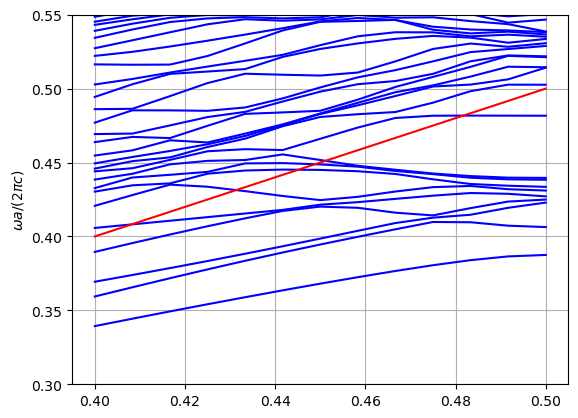

In [5]:
import matplotlib.pyplot as plt
numk,tmp=np.shape(te_freqs)
klist=np.linspace(0.4,0.5,numk)
fig,ax=plt.subplots()
x = range(len(te_freqs))
ratio=len(te_freqs)
for l in range(num_bands):
    plt.plot(klist,te_freqs[:,l],'b-')
plt.plot(klist,klist,'r-')
plt.ylim([0.3,0.55])
plt.grid()
plt.ylabel('$\omega a/(2\pi c)$')

上面是计算的结果,和COMSOL不能完全一样，但是也比较相似了

### 结构的具体可视化


也可以对结构进行可视化，但是要注意进行结构的rectify，这样看到的才是实际结构，不然默认是在Lattice坐标下的

epsilon: 1-4.56933, mean 1.12965, harm. mean 1.0301, 3.86733% > 1, 3.63246% "fill"
real part range: 1 .. 1


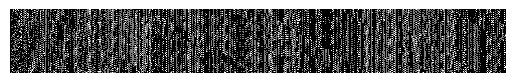

In [10]:
md = mpb.MPBData(rectify=True, periods=1, resolution=64)
eps = ms.get_epsilon()
converted_eps = md.convert(eps[:,:,45])

fig=plt.figure()
plt.imshow(converted_eps, interpolation='spline36', cmap='binary')
plt.axis('off')
plt.show()

也可以用mayavi看三维图，发现设置是准确的

In [12]:
from mayavi import mlab
md = mpb.MPBData(rectify=True, periods=1, resolution=64)
eps = ms.get_epsilon()
converted_eps = md.convert(eps)
mlab.contour3d(converted_eps )
mlab.show()

epsilon: 1-4.56933, mean 1.12965, harm. mean 1.0301, 3.86733% > 1, 3.63246% "fill"
real part range: 1 .. 4.56933
